## Utility Functions

It is good practice to keep your utility functions (functions that perform certain operations) separate from your machine learning pipeline. This helps you:

1. Focus on each operation/functionality on its own
2. Better trace code when something breaks
3. Perform unit testing

In [14]:
### All imports we will need
import cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# use interactive plots
# %matplotlib qt 

In [15]:
#### set debug to false when imported from another 

## Data Preprocessing Utilities
Functions that implement the preprocessing operations

In [16]:
def preprocess(img):
    # Preprocess the given image img.
    
    # [1] TODO: Convert the image to grayscale (~1 line)
    # Hint: Check the function cvtColor in opencv.
    img2 = np.copy(img) 

    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY )

    # [2] TODO: Blur the image to remove the noise (apply a 3x3 filter) (~1 line)
    # Hint: Check the function blur in opencv.
    # Hint: Pass the kernel size as an array (3, 3)

    ksize = (3, 3)
    blur = cv2.blur(gray, ksize) 

    # [3] TODO: Convert the grayscale image to a binary image. Apply a threshold between 50 and 255 on the blurred image.
    #       The pixels having values less than 50 will be considered 0, and 255 otherwise. (~1 line)
    # Hint: Check the function threshold in opencv.
    # Hint: Use the type cv2.THRESH_BINARY with the type parameter.
    # Hint: This function has two return parameters. You can ignore the first one, and the second is the binary image.
    # Example: _, thresholded_img = cv2.threshold(....)

    _, thresholded_img = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
    
    
    return thresholded_img

In [17]:
IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    img = cv2.imread('images/rectangle/rec1.png')
    thresholded_img = preprocess(img)
    assert np.all((thresholded_img==255) | (thresholded_img==0)), \
        'Preprocessing is incomplete: the resulting final image should be all 0 or 255'

## Feature Extraction Utilities
Functions that implement feature extractors

In [18]:
def findContourArea(img):
    # This function finds the contours of a given image and returns it in the variable contours.
    ## understand contours: 
    ### Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. 
    ### The contours are a useful tool for shape analysis and object detection and recognition.

    # NOTE: This function will not work correctly unless you preprocess the image properly as indicated.
    contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ## the function findContours returns an array of contours and their hierarchy,
    ## Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
    ## the list is sorted in terms of hierarchy, this means the outmost contour is in contours[0], 
    ## and their direct inner contours are in contours[1] and so on and so forth

    # [4] TODO: Find the contour area of the given image (img) (~1 line)
    # Hint: check the function contourArea in opencv.
    # Hint: think which contour should be passed as argument to the function (which contour we should calculate its area)
    area = 0
    area = cv2.contourArea(contours[1]) #getting the area of the actual figure by considering the outer cont.

    return area, contours

In [19]:
def findBoundingRectangleArea(img, contours):
    # This function tries to fit the minimum bounding rectangle for the given contours.

    # [5] TODO: Find the minimum bounding rectangle that can fit the given contours.
    # Hint: Check the function boundingRect in opencv
   
    x,y,w,h = cv2.boundingRect(contours[1])

    # TODO (Optional): You can uncomment the following lines to show or display the bounded rectangle.
    bounding_rectangle = None
    bounding_rectangle = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
    # if bounding_rectangle: ## not none
    #     cv2.imshow('Image_Rec', bounding_rectangle)
    #     cv2.waitKey(0)

    # [6] TODO: Find the area of the bounding rectangle
    area = 0
    area = w*h
    return area, bounding_rectangle

In [20]:
def findBoundingCircleArea(img, contours):
    # This function tries to fit the minimum bounding circle for the given contours.

    # [7] TODO: Find the minimum enclosing circle that can fit the given contours.
    # Hint: Check the function minEnclosingCircle in opencv

    (x,y),radius = cv2.minEnclosingCircle(contours[1])
    center = (int(x),int(y))
    radius = int(radius)
    
    # TODO (Optional): You can uncomment the following lines to show or display the bounded circle.
    bounding_circle = None
    bounding_circle = cv2.circle(img.copy(), center, radius, (0, 255, 0), 2)
    # if bounding_circle: ## not none
    #     cv2.imshow('Image_Circle', bounding_circle)
    #     cv2.waitKey(0)

    # [8] TODO: Find the area of the bounding circle
    area = 0
    area = np.pi * (radius*radius)
    return area, bounding_circle

In [21]:
def findBoundingTriangleArea(img, contours):
    # This function tries to fit the minimum bounding triangle for the given contours.

    # [9] TODO: Find the minimum enclosing triangle that can fit the given contours.
    # Hint: Check the function minEnclosingTriangle in opencv and place its output in the variable x

    x = cv2.minEnclosingTriangle(contours[1])

    # TODO (Optional): You can uncomment the following lines to show or display the bounded triangle.
    bounding_triangle = None
    bounding_triangle = cv2.polylines(img.copy(), np.int32([x[1]]), True, (0, 255, 0), 2)
    # if bounding_triangle: ## not none
    #     cv2.imshow('Image_Triangle', bounding_triangle)
    #     cv2.waitKey(0)

    # [10] TODO: Find the area of the bounding circle
    area = x[0]
    return area, bounding_triangle

In [22]:
IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    img = cv2.imread('images/rectangle/rec1.png')
    thresholded_img = preprocess(img) ### assuming this function is behaving correctly
    img_area, img_contours = findContourArea(thresholded_img)
    rect_area, bounding_rectangle = findBoundingRectangleArea(thresholded_img, img_contours)
    circ_area, bounding_circle = findBoundingCircleArea(thresholded_img, img_contours)
    tri_area, bounding_triangle = findBoundingTriangleArea(thresholded_img, img_contours)

    assert round(img_area, 2)==14150.5,\
        f'findContourArea() is incorrect, expected {14150.5} found {img_area}'
    assert round(rect_area, 2)==16120.0, \
        f'findBoundingRectangleArea() is incorrect, expected {16120.0} found {rect_area}'
    assert round(circ_area, 2)==23235.22, \
        f'findBoundingCircleArea() is incorrect, expected {23235.22} found {circ_area}'
    assert round(tri_area,2)==25933.5, \
        f'findBoundingTriangleArea() is incorrect, expected {25933.5} found {tri_area}'
    
    # plt.figure()
    # plt.imshow(bounding_rectangle)
    # plt.title('Adding a rectangular boundary')
    # plt.show()

    # plt.figure()
    # plt.imshow(bounding_circle)
    # plt.title('Adding a circular boundary')
    # plt.show()

    # plt.figure()
    # plt.imshow(bounding_triangle)
    # plt.title('Adding a triangular boundary')
    # plt.show()

In [23]:
def extract_features(img, class_number=None):
    # Given an image img, extract the following features.
    # 1. The ratio between the figure area and the minimum enclosing rectangle.
    # 2. The ratio between the figure area and the minimum enclosing circle.
    # 3. The ratio between the figure area and the minimum enclosing triangle.

    area, contours = findContourArea(img)
    area1, _ = findBoundingRectangleArea(img, contours)
    area2, _ = findBoundingCircleArea(img, contours)
    area3, _ = findBoundingTriangleArea(img, contours)

    features = []
    # [11] TODO: Extract the features and append the class_number (if given) in the beginning of each feature vector.
    if (class_number):
        features.append(class_number)
    features.append(area/area1)
    features.append(area/area2)
    features.append(area/area3)

    return features


In [24]:
IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    expected_features = np.array([1.0, 0.88, 0.61, 0.55])
    results = np.array(extract_features(thresholded_img, 1))
    results = np.round(results, 2)
    print(results)
    assert np.all(results == expected_features), \
        f'extract_features() is incorrect'

[1.   0.88 0.61 0.55]


## Data Plotting Utilities
Functions that implement 3D plots to visualize data

In [25]:
def plot(x, y, z, title='', xlabel='', ylabel='', zlabel='', color_style_str='', label_str='', figure=None, axis=None):
    # [12] TODO: Add title, x_label, y_label, z_label to axis (~4 lines)

    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_zlabel(zlabel)
    axis.set_title(title)   

    # [13] TODO: Scatter plot of data points with coordinates (x, y, z) with the corresponding color and label (~1 line)

    axis.scatter(x,y, z, color=color_style_str, label = label_str)

    handles, labels = axis.get_legend_handles_labels()

    unique = list(set(labels))
    handles = [handles[labels.index(u)] for u in unique]
    labels = [labels[labels.index(u)] for u in unique]

    axis.legend(handles, labels)

C:\Users\Asmaa Adel\AppData\Local\Temp\ipykernel_1444\4198473959.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot('111', projection='3d')


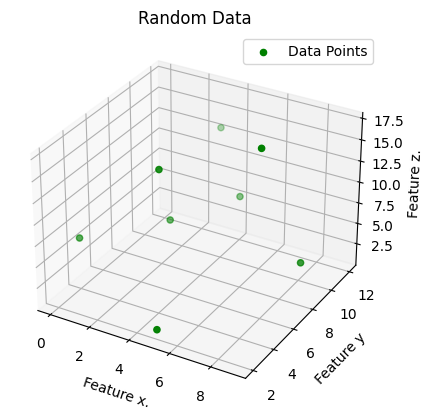

In [26]:
# IN_DEBUG = True ## uncomment this line when you need to test your code, then re-comment it when done

if IN_DEBUG:    
    ### test your implementation
    ######## DO NOT CHANGE THIS CODE ########
    np.random.seed(0)
    x = np.random.randint(10, size=8)
    y = np.random.randint(15, size=8)
    z = np.random.randint(20, size=8)
    fig = plt.figure()
    ax = fig.add_subplot('111', projection='3d')
    plot(x, y, z, title='Random Data',
               xlabel='Feature x.', ylabel='Feature y', zlabel='Feature z.', color_style_str='g',
               label_str="Data Points",
               figure=fig, axis=ax)
    plt.show()

**EXPECTED PLOT**
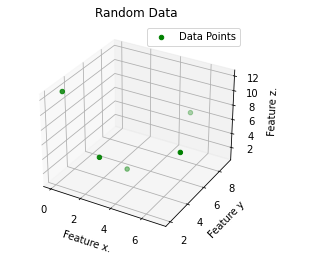

## Classifiers Utilities
Functions that implement the classification algorithms

In [27]:
def calculateDistance(x1, x2):
    # [14] TODO: Calculate the Euclidean distance between the two vectors x1 and x2. (~ 1 line)
    distance = 0
    distance = np.linalg.norm(x1-x2)
    return distance

In [28]:
def MinimumDistanceClassifier(test_point, training_points):
    # [15] TODO: Implement the minumum distance classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.

    labels = np.array([a_tuple[0] for a_tuple in training_points])

    class1 = training_points[labels == 1]      
    class2 = training_points[labels == 2]      
    class3 = training_points[labels == 3]      

    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)
    mean3 = np.mean(class3, axis=0)
          
    mean1 = np.array([mean1[1], mean1[2],mean1[3]])
    mean2 = np.array([mean2[1], mean2[2],mean2[3]])
    mean3 = np.array([mean3[1], mean3[2],mean3[3]])

    distance1 = calculateDistance(test_point, mean1)    
    distance2 = calculateDistance(test_point, mean2)    
    distance3 = calculateDistance(test_point, mean3)    

    distances = np.array([distance1, distance2, distance3])
    
    # بيرجع الاندكس بتاع اصغر رقم عشان كدا بجمع 1
    classification = np.argmin(distances) + 1
    return classification

In [29]:
def NearestNeighbor(test_point, all_points):
    # [16] TODO: Implement the Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    labels = np.array([a_tuple[0] for a_tuple in all_points])
    labels = labels.astype(int)
    
    distances = []

    for dataset_point in all_points:
        dataset_point = np.array([dataset_point[1], dataset_point[2],dataset_point[3]])
        distances.append(calculateDistance(dataset_point, test_point))
    
    # بيرجع الاندكس بتاع اصغر رقم عشان كدا بجمع 1
    # بروح ااكسس الرقم المقابل للاندكس دا ف الليبل
    nearest_neighbor = np.argmin(np.array(distances))
    classification = labels[nearest_neighbor]
    
    return classification

In [30]:
def KNN(test_point, all_points, k):
    # [17] TODO: Implement the K-Nearest Neighbour classifier.
    #  You have to classify the test_point whether it belongs to class 1, 2 or 3.
    labels = np.array([a_tuple[0] for a_tuple in all_points])

    labels = labels.astype(int)

    distances = []

    for dataset_point in all_points:
        dataset_point = np.array([dataset_point[1], dataset_point[2],dataset_point[3]])
        distances.append(calculateDistance(dataset_point, test_point))

                   # 0 1 2
    # الفانكشن دى بتجيبلى الترتيب بتاع الاندكس يعنى [8 1 4] هتبقى [1 2 0]
    # عشان اعرف ااكسس الاندكس من الاراى بتاعت الليبل
    sort_code = np.argsort(np.array(distances))
    # هرتب الليبل حسب السورت اللى حسبته
    labels = labels[sort_code]
    
    # هلف على اول ايليمنتس هو مدينى عددهم وهحطهم ف اندكس حسب هما انهى ليبل
    # هيبى هو دا الكلاسيفيكيشن
    # هجيب الاندكس بتاع اكبر رقم منهم عشان كدا بجمع 1
    votes = [0, 0, 0]
    for i in range(k):
        votes[labels[i]-1] += 1
    classification = np.argmax(np.array(votes)) + 1
    return classification

## Model Testing Utilities
Functions that help in the classification algorithms' testing

In [31]:
def get_class_from_file_name(file_name):
    return file_name.split("test\\")[1].split(".")[0]


def get_class_name(class_number):
    classes = ["", "Rectangle", "Circle", "Triangle"]
    return classes[int(class_number)]